### Labeling Features

This example shows how to add labels to vector layer features using Matplotlib. We will take a polygon layer of districts and add an annotation to show the district name at the centroid of each polygon.


#### Setup and Data Download

In [ ]:
%%capture
if 'google.colab' in str(get_ipython()):
  !apt install libspatialindex-dev
  !pip install fiona shapely pyproj rtree mapclassify
  !pip install geopandas

In [1]:
import os
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
data_folder = 'data'
output_folder = 'output'

if not os.path.exists(data_folder):
    os.mkdir(data_folder)
if not os.path.exists(output_folder):
    os.mkdir(output_folder)

In [3]:
def download(url):
    filename = os.path.join(data_folder, os.path.basename(url))
    if not os.path.exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)

filename = 'karnataka.gpkg'
data_url = 'https://github.com/spatialthoughts/python-dataviz-web/raw/main/data/osm/'
download(data_url + filename)


#### Data Pre-Processing

We read the `districts` layer from the input geopackage using GeoPandas.

In [4]:
path = os.path.join(data_folder, filename)
districts_gdf = gpd.read_file(path, layer='karnataka_districts')

Let's say we want to add a label for each of the district polygons. First, we need to decide the anchor position of the label. We can use `representative_point()` to get a point inside each polygon that best represents the geometry. It is similar to a centroid, but is guranteed to be inside the polygon. Below code creates a new field in the GeoDataFrame called `label_position` with the coordinates of the anchor point.

In [5]:
# custom function to get anchor position of label
def get_label_position(row):
  geometry = row['geometry']
  location = geometry.representative_point()
  # We need the location as a tuple of x,y coordinates
  location_coords = location.coords[0]
  return location_coords

districts_gdf['label_position'] = districts_gdf.apply(get_label_position, axis=1)
districts_gdf

,DISTRICT,ST_NM,ST_CEN_CD,DT_CEN_CD,censuscode,geometry,label_position
0,Bagalkot,Karnataka,29,2,556,"MULTIPOLYGON (((76.24100 16.16531, 76.23538 16...","(75.58047410145613, 16.289653980301726)"
1,Bangalore Rural,Karnataka,29,29,583,"MULTIPOLYGON (((77.38701 13.50002, 77.40099 13...","(77.33959745308506, 13.1809216324482)"
2,Bangalore,Karnataka,29,18,572,"MULTIPOLYGON (((77.83549 12.86809, 77.83213 12...","(77.55306792001653, 12.943591455447502)"
3,Belgaum,Karnataka,29,1,555,"MULTIPOLYGON (((75.02647 16.93264, 75.02827 16...","(74.88938778421912, 16.163303022767483)"
4,Bellary,Karnataka,29,11,565,"MULTIPOLYGON (((77.15757 15.13706, 77.15887 15...","(76.70988428058831, 15.197823895458509)"
5,Bidar,Karnataka,29,4,558,"MULTIPOLYGON (((77.34032 18.43689, 77.34510 18...","(77.25614390783848, 18.0191392897869)"
6,Bijapur,Karnataka,29,3,557,"MULTIPOLYGON (((76.07344 17.33403, 76.07030 17...","(75.88233434119917, 16.815679516945124)"
7,Chamrajnagar,Karnataka,29,24,578,"MULTIPOLYGON (((77.32282 12.30709, 77.32726 12...","(77.10167859489152, 11.947521317665414)"
8,Chikkaballapura,Karnataka,29,28,582,"MULTIPOLYGON (((78.19960 13.56615, 78.19897 13...","(77.78175694204899, 13.588922657891462)"
9,Chikmagalur,Karnataka,29,16,570,"MULTIPOLYGON (((76.35411 13.57770, 76.35611 13...","(75.64002331813991, 13.405599891209146)"


#### Annotating Labels

We can now plot the districts and add an annotation for each polygon. We iterate over each row of the GeoDataFrame and add the annotation with name of the district at its centroid coordinates using `annotate()` function.

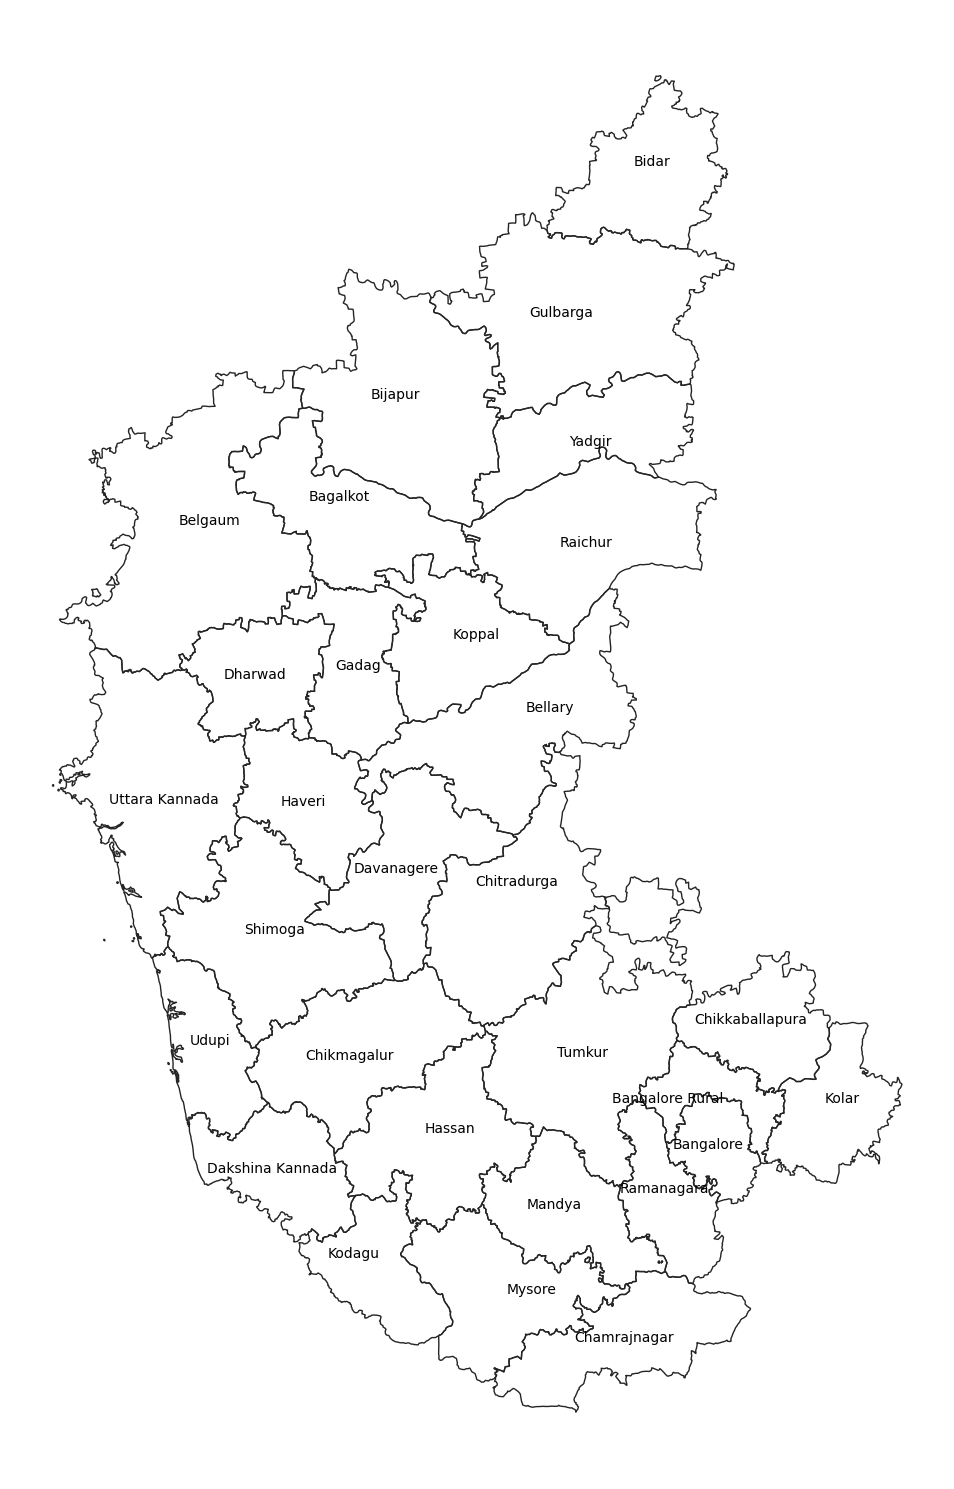

In [6]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(10,15)

districts_gdf.plot(ax=ax, linewidth=1, facecolor='none', edgecolor='#252525')

# iterate over rows and annotate district at label position
for idx, row in districts_gdf.iterrows():
   ax.annotate(text=row['DISTRICT'], xy=row['label_position'], horizontalalignment='center')
ax.set_axis_off()
plt.tight_layout()
plt.show()